In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Filling null values in Age column

In [ ]:
mean = df_train['Age'].mean()
std  = df_train['Age'].std()

In [ ]:
null_size = df_train['Age'].isnull().sum()
rand_age = np.random.randint(mean-std,mean+std,size = null_size)

In [ ]:
age_slice = df_train['Age'].copy()
age_slice[np.isnan(age_slice)]=rand_age
df_train['Age'] = age_slice

In [ ]:
mean = df_test['Age'].mean()
std  = df_test['Age'].std()

In [ ]:
null_size = df_test['Age'].isnull().sum()
rand_age = np.random.randint(mean-std,mean+std,size = null_size)

In [ ]:
age_slice = df_test['Age'].copy()
age_slice[np.isnan(age_slice)]=rand_age
df_test['Age'] = age_slice

## Converting into Categorical values

In [ ]:
df_train['Age'] = df_train['Age'].astype(int)
df_train.loc[(df_train['Age']<1),'Age'] = 0
df_train.loc[(df_train['Age']>=1) & (df_train['Age']<6),'Age'] = 1
df_train.loc[(df_train['Age']>=6) & (df_train['Age']<18),'Age'] = 2
df_train.loc[(df_train['Age']>=18) & (df_train['Age']<30),'Age'] = 3
df_train.loc[(df_train['Age']>=30) & (df_train['Age']<60),'Age'] = 4
df_train.loc[(df_train['Age']>=60),'Age'] = 5
df_train['AgeSTR'] = df_train['Age'].astype(str)

In [ ]:
df_test['Age'] = df_test['Age'].astype(int)
df_test.loc[(df_test['Age']<1),'Age'] = 0
df_test.loc[(df_test['Age']>=1) & (df_test['Age']<6),'Age'] = 1
df_test.loc[(df_test['Age']>=6) & (df_test['Age']<18),'Age'] = 2
df_test.loc[(df_test['Age']>=18) & (df_test['Age']<30),'Age'] = 3
df_test.loc[(df_test['Age']>=30) & (df_test['Age']<60),'Age'] = 4
df_test.loc[(df_test['Age']>=60),'Age'] = 5
df_test['AgeSTR'] = df_test['Age'].astype(str)

In [ ]:
df_train['Titles'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)
df_train['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
df_train['Titles'] = df_train['Titles'].replace('Mme','Mrs')
df_train['Titles'] = df_train['Titles'].replace('Ms','Miss')
df_train['Titles'] = df_train['Titles'].replace('Mlle','Miss')
df_train['Titles'] = df_train['Titles'].replace(['Master','Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer'],'Rare')

In [ ]:
df_test['Titles'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)

df_test['Titles'] = df_test['Titles'].replace('Mme','Mrs')
df_test['Titles'] = df_test['Titles'].replace('Ms','Miss')
df_test['Titles'] = df_test['Titles'].replace('Mlle','Miss')
df_test['Titles'] = df_test['Titles'].replace(['Master','Don','Rev','Dona','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer'],'Rare')

df_test['Titles'].unique()


array(['Mr', 'Mrs', 'Miss', 'Rare'], dtype=object)

In [ ]:
df_train['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare'], dtype=object)

In [ ]:
titles = {'Mr':0,'Mrs':1,'Miss':2,'Rare':3}
df_train['Titles']=df_train['Titles'].map(titles)
df_test['Titles']=df_test['Titles'].map(titles)

df_train['Titles']=df_train['Titles'].astype(str)
df_test['Titles']=df_test['Titles'].astype(str)

In [ ]:
df_test['Fare'] = df_test['Fare'].fillna(0.0)
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeSTR           0
Titles           0
dtype: int64

In [ ]:
df_train['Fare'] = df_train['Fare'].astype(float)
df_train.loc[(df_train['Fare']<8.0),'Fare'] = 0
df_train.loc[(df_train['Fare']>=8.0) & (df_train['Fare']<15.0),'Fare'] = 1
df_train.loc[(df_train['Fare']>=15.0) & (df_train['Fare']<30.0),'Fare'] = 2
df_train.loc[(df_train['Fare']>=30.0) & (df_train['Fare']<74.0),'Fare'] = 3
df_train.loc[(df_train['Fare']>=74.0) & (df_train['Fare']<265.0),'Fare'] = 4
df_train.loc[(df_train['Fare']>=265.0),'Fare'] = 5


In [ ]:
df_test['Fare'] = df_test['Fare'].astype(float)
df_test.loc[(df_test['Fare']<8.0),'Fare'] = 0
df_test.loc[(df_test['Fare']>=8.0) & (df_test['Fare']<15.0),'Fare'] = 1
df_test.loc[(df_test['Fare']>=15.0) & (df_test['Fare']<30.0),'Fare'] = 2
df_test.loc[(df_test['Fare']>=30.0) & (df_test['Fare']<74.0),'Fare'] = 3
df_test.loc[(df_test['Fare']>=74.0) & (df_test['Fare']<265.0),'Fare'] = 4
df_test.loc[(df_test['Fare']>=265.0),'Fare'] = 5


## New Features---> Famlymem(total family mem), Age/Class--(product of column age and class) and Fare/per(fare per person in a family).

In [ ]:
df_train['Farestr'] = df_train['Fare'].astype(str)
df_test['Farestr'] = df_test['Fare'].astype(str)

In [ ]:
df_train['Sex'].replace('female','F',inplace = True)
df_train['Sex'].replace('male','M',inplace = True)

df_test['Sex'].replace('female','F',inplace = True)
df_test['Sex'].replace('male','M',inplace = True)

## Famlymem

In [ ]:
df_train['famlymem'] = df_train['Parch'] + df_train['SibSp']
df_test['famlymem'] = df_test['Parch'] + df_test['SibSp']

In [ ]:
df_train['famlymem'] = df_train['famlymem'].astype(int)
df_train.loc[(df_train['famlymem']==0),'famlymem'] = 0
df_train.loc[(df_train['famlymem']>0) & (df_train['famlymem']<=2),'famlymem'] = 1
df_train.loc[(df_train['famlymem']>2) & (df_train['famlymem']<=3),'famlymem'] = 2
df_train.loc[(df_train['famlymem']>3) & (df_train['famlymem']<=6),'famlymem'] = 3
df_train.loc[(df_train['famlymem']>6),'famlymem'] = 4

df_train['famlymemstr'] = df_train['famlymem'].astype(str)

In [ ]:
df_test['famlymem'] = df_test['famlymem'].astype(int)
df_test.loc[(df_test['famlymem']==0),'famlymem'] = 0
df_test.loc[(df_test['famlymem']>0) & (df_test['famlymem']<=2),'famlymem'] = 1
df_test.loc[(df_test['famlymem']>2) & (df_test['famlymem']<=3),'famlymem'] = 2
df_test.loc[(df_test['famlymem']>3) & (df_test['famlymem']<=6),'famlymem'] = 3
df_test.loc[(df_test['famlymem']>6),'famlymem'] = 4

df_test['famlymemstr'] = df_test['famlymem'].astype(str)

In [ ]:
df_train.loc[(df_train['famlymem']==0),'Alone'] = 1
df_train.loc[(df_train['famlymem']>0),'Alone']  = 0

df_test.loc[(df_test['famlymem']==0),'Alone']   = 1
df_test.loc[(df_test['famlymem']>0),'Alone']    = 0

df_test['Alone'] = df_test['Alone'].astype(int)
df_train['Alone'] = df_train['Alone'].astype(int)

#notAlone
df_train.loc[(df_train['famlymem']==0),'NotAlone'] = 0
df_train.loc[(df_train['famlymem']>0),'NotAlone']  = 1

df_test.loc[(df_test['famlymem']==0),'NotAlone']   = 0
df_test.loc[(df_test['famlymem']>0),'NotAlone']    = 1

df_test['NotAlone'] = df_test['NotAlone'].astype(int)
df_train['NotAlone'] = df_train['NotAlone'].astype(int)


In [ ]:
df_train['PclassSTR'] = df_train['Pclass'].astype(str)
df_test['PclassSTR'] = df_test['Pclass'].astype(str)

In [ ]:
df_train.isnull().sum()

## Age/class

In [ ]:
df_train['Age/Class'] = df_train['Age']*df_train['Pclass']
df_test['Age/Class'] = df_test['Age']*df_test['Pclass']

In [ ]:
df_train['Age/Class'] = df_train['Age/Class'].astype(int)
df_train.loc[(df_train['Age/Class']>=0) & (df_train['Age/Class']<=2),'Age/Class'] = 0
df_train.loc[(df_train['Age/Class']>2) & (df_train['Age/Class']<=4),'Age/Class'] = 1
df_train.loc[(df_train['Age/Class']>4) & (df_train['Age/Class']<=8),'Age/Class'] = 2
df_train.loc[(df_train['Age/Class']>8),'Age/Class'] = 3

df_test['Age/Class'] = df_test['Age/Class'].astype(int)
df_test.loc[(df_test['Age/Class']>=0) & (df_test['Age/Class']<=2),'Age/Class'] = 0
df_test.loc[(df_test['Age/Class']>2) & (df_test['Age/Class']<=4),'Age/Class'] = 1
df_test.loc[(df_test['Age/Class']>4) & (df_test['Age/Class']<=8),'Age/Class'] = 2
df_test.loc[(df_test['Age/Class']>8),'Age/Class'] = 3

df_train['Age/Class'] = df_train['Age/Class'].astype(str)
df_test['Age/Class'] = df_test['Age/Class'].astype(str)

## Fare/per

In [ ]:
df_train['Fare/per'] = df_train['Fare']/(df_train['famlymem']+1)
df_test['Fare/per'] = df_test['Fare']/(df_test['famlymem']+1)

In [ ]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_test['Fare'] = df_test['Fare'].astype(int)

In [ ]:
df_train['Fare/per'] = df_train['Fare/per'].astype(int)
df_train.loc[(df_train['Fare/per']>=0.0) & (df_train['Fare/per']<=0.33),'Fare/per'] = 0
df_train.loc[(df_train['Fare/per']>0.33) & (df_train['Fare/per']<=1.00),'Fare/per'] = 1
df_train.loc[(df_train['Fare/per']>1.00) & (df_train['Fare/per']<=1.50),'Fare/per'] = 2
df_train.loc[(df_train['Fare/per']>1.50) & (df_train['Fare/per']<=3.00),'Fare/per'] = 3
df_train.loc[(df_train['Fare/per']>3.00),'Fare/per'] = 4

df_test['Fare/per'] = df_test['Fare/per'].astype(int)
df_test.loc[(df_test['Fare/per']>=0.0) & (df_test['Fare/per']<=0.33),'Fare/per'] = 0
df_test.loc[(df_test['Fare/per']>0.33) & (df_test['Fare/per']<=1.00),'Fare/per'] = 1
df_test.loc[(df_test['Fare/per']>1.00) & (df_test['Fare/per']<=1.50),'Fare/per'] = 2
df_test.loc[(df_test['Fare/per']>1.50) & (df_test['Fare/per']<=3.00),'Fare/per'] = 3
df_test.loc[(df_test['Fare/per']>3.00),'Fare/per'] = 4

df_train['Fare/per'] = df_train['Fare/per'].astype(str) 
df_test['Fare/per']  = df_test['Fare/per'].astype(str)

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeSTR           0
Titles           0
Farestr          0
famlymem         0
famlymemstr      0
Alone            0
NotAlone         0
PclassSTR        0
dtype: int64

In [ ]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeSTR           0
Titles           0
Farestr          0
famlymem         0
famlymemstr      0
Alone            0
NotAlone         0
PclassSTR        0
dtype: int64

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeSTR,Titles,Farestr,famlymem,famlymemstr,Alone,NotAlone,PclassSTR,Age/Class,Fare/per
0,1,0,3,"Braund, Mr. Owen Harris",M,3,1,0,A/5 21171,0,NaN,S,3,0,0.0,1,1,0,1,3,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,4,1,0,PC 17599,3,C85,C,4,1,3.0,1,1,0,1,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",F,3,0,0,STON/O2. 3101282,0,NaN,S,3,2,0.0,0,0,1,0,3,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,4,1,0,113803,3,C123,S,4,1,3.0,1,1,0,1,1,1,1
4,5,0,3,"Allen, Mr. William Henry",M,4,0,0,373450,1,NaN,S,4,0,1.0,0,0,1,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,3,0,0,211536,1,NaN,S,3,3,1.0,0,0,1,0,2,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",F,3,0,0,112053,3,B42,S,3,2,3.0,0,0,1,0,1,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,3,1,2,W./C. 6607,2,NaN,S,3,2,2.0,2,2,0,1,3,3,0
889,890,1,1,"Behr, Mr. Karl Howell",M,3,0,0,111369,3,C148,C,3,0,3.0,0,0,1,0,1,1,3


In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeSTR,Titles,Farestr,famlymem,famlymemstr,Alone,NotAlone,PclassSTR,Age/Class,Fare/per
0,892,3,"Kelly, Mr. James",M,4,0,0,330911,0,NaN,Q,4,0,0.0,0,0,1,0,3,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",F,4,1,0,363272,0,NaN,S,4,1,0.0,1,1,0,1,3,3,0
2,894,2,"Myles, Mr. Thomas Francis",M,5,0,0,240276,1,NaN,Q,5,0,1.0,0,0,1,0,2,3,1
3,895,3,"Wirz, Mr. Albert",M,3,0,0,315154,1,NaN,S,3,0,1.0,0,0,1,0,3,3,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",F,3,1,1,3101298,1,NaN,S,3,1,1.0,1,1,0,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",M,3,0,0,A.5. 3236,1,NaN,S,3,0,1.0,0,0,1,0,3,3,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",F,4,0,0,PC 17758,4,C105,C,4,3,4.0,0,0,1,0,1,1,4
415,1307,3,"Saether, Mr. Simon Sivertsen",M,4,0,0,SOTON/O.Q. 3101262,0,NaN,S,4,0,0.0,0,0,1,0,3,3,0
416,1308,3,"Ware, Mr. Frederick",M,2,0,0,359309,1,NaN,S,2,0,1.0,0,0,1,0,3,2,1


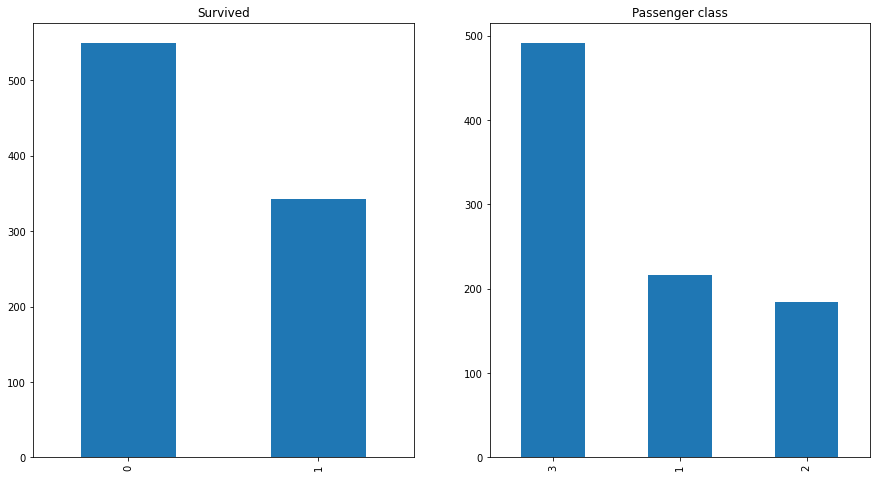

In [ ]:
plt.figure(1)
plt.subplot(121)
df_train['Survived'].value_counts().plot.bar(figsize = (15,8),title = 'Survived')
plt.subplot(122)
df_train['Pclass'].value_counts().plot.bar(figsize = (15,8),title = 'Passenger class')


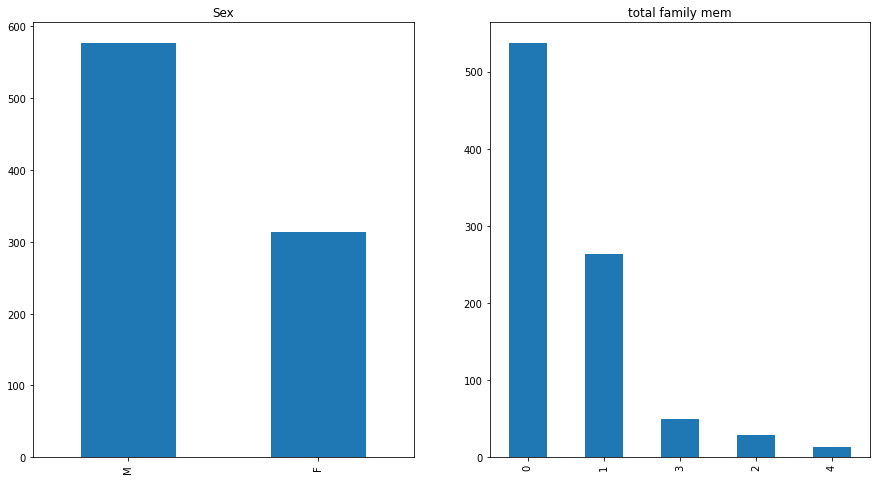

In [ ]:
plt.figure(2)
plt.subplot(121)
df_train['Sex'].value_counts().plot.bar(figsize = (15,8),title = 'Sex')
plt.subplot(122)
df_train['famlymem'].value_counts().plot.bar(figsize = (15,8),title = 'total family mem')


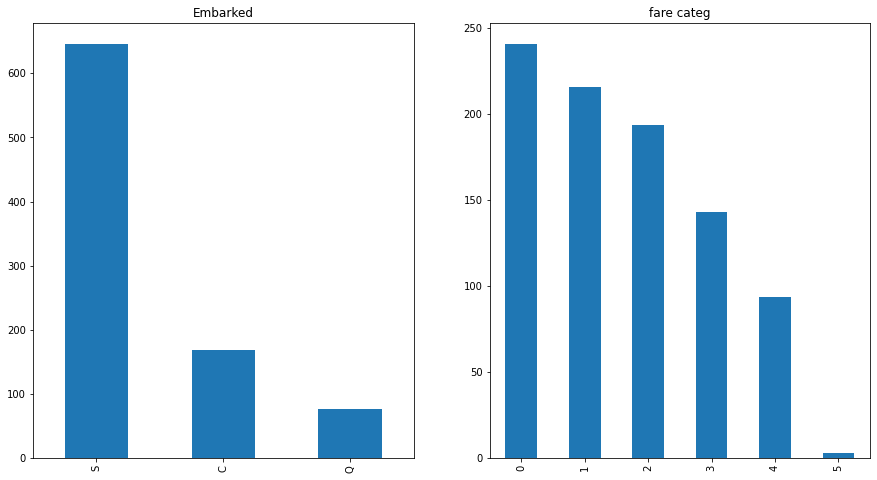

In [ ]:
plt.figure(4)
plt.subplot(121)
df_train['Embarked'].value_counts().plot.bar(figsize = (15,8),title = 'Embarked')

plt.subplot(122)
df_train['Fare'].value_counts().plot.bar(figsize = (15,8),title = 'fare categ')

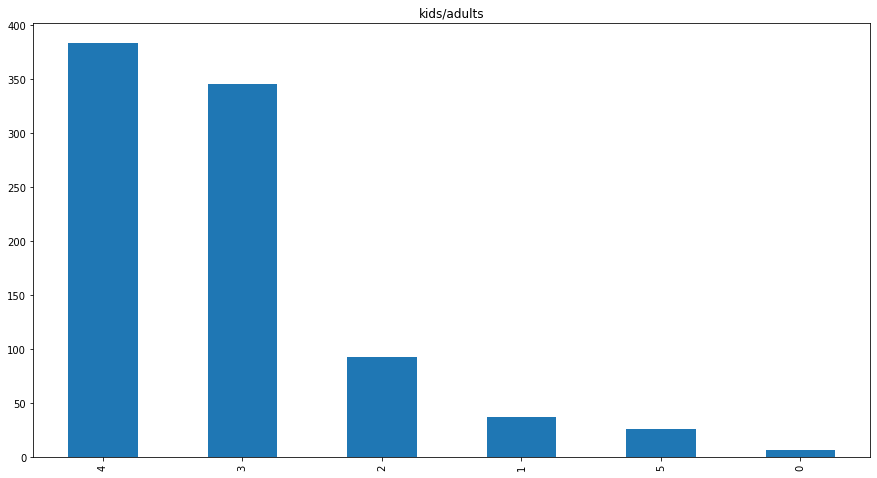

In [ ]:
df_train['Age'].value_counts().plot.bar(figsize = (15,8),title = 'kids/adults')

In [ ]:
pclass   = pd.crosstab(df_train['Pclass'], df_train['Survived'])
sex      = pd.crosstab(df_train['Sex'], df_train['Survived'])
parch    = pd.crosstab(df_train['Parch'], df_train['Survived'])
age_bins = pd.crosstab(df_train['Age'], df_train['Survived'])
embarked = pd.crosstab(df_train['Embarked'], df_train['Survived'])
fare     = pd.crosstab(df_train['Fare'], df_train['Survived'])
totfam   = pd.crosstab(df_train['famlymem'], df_train['Survived'])
ageclass = pd.crosstab(df_train['Age/Class'], df_train['Survived'])
fareper  = pd.crosstab(df_train['Fare/per'], df_train['Survived'])

In [ ]:
totfam

Survived,0,1
famlymem,,
0,374,163
1,115,148
2,8,21
3,39,10
4,13,0


In [ ]:
ageclass

Survived,0,1
Age/Class,,
0,3,30
1,80,139
2,151,88
3,315,85


In [ ]:
fareper

Survived,0,1
Fare/per,,
0,264,83
1,205,150
3,75,84
4,5,25


In [ ]:
pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
age_bins

Survived,0,1
Age,,
0,0,7
1,13,24
2,53,40
3,230,115
4,234,149
5,19,7


In [ ]:
fare

Survived,0,1
Fare,,
0,189,52
1,154,62
2,107,87
3,76,67
4,23,71
5,0,3


In [ ]:
sex

Survived,0,1
Sex,,
F,81,233
M,468,109


In [ ]:
parch

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [ ]:
embarked

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [ ]:
df = df_train.drop(['Ticket','Cabin','Name','PassengerId'],axis = 1)

In [ ]:
dft = df_test.drop(['Ticket','Cabin','Name','PassengerId'],axis = 1)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
dft = pd.get_dummies(dft)

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,famlymem,Alone,NotAlone,Sex_F,Sex_M,Embarked_C,Embarked_Q,Embarked_S,AgeSTR_0,AgeSTR_1,AgeSTR_2,AgeSTR_3,AgeSTR_4,AgeSTR_5,Titles_0,Titles_1,Titles_2,Titles_3,Farestr_0.0,Farestr_1.0,Farestr_2.0,Farestr_3.0,Farestr_4.0,Farestr_5.0,famlymemstr_0,famlymemstr_1,famlymemstr_2,famlymemstr_3,famlymemstr_4,PclassSTR_1,PclassSTR_2,PclassSTR_3,Age/Class_0,Age/Class_1,Age/Class_2,Age/Class_3,Fare/per_0,Fare/per_1,Fare/per_3,Fare/per_4
0,0,3,3,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
1,1,1,4,1,0,3,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1,3,3,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
3,1,1,4,1,0,3,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,3,4,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,3,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
887,1,1,3,0,0,3,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
888,0,3,3,1,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
889,1,1,3,0,0,3,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [ ]:
import seaborn as sns

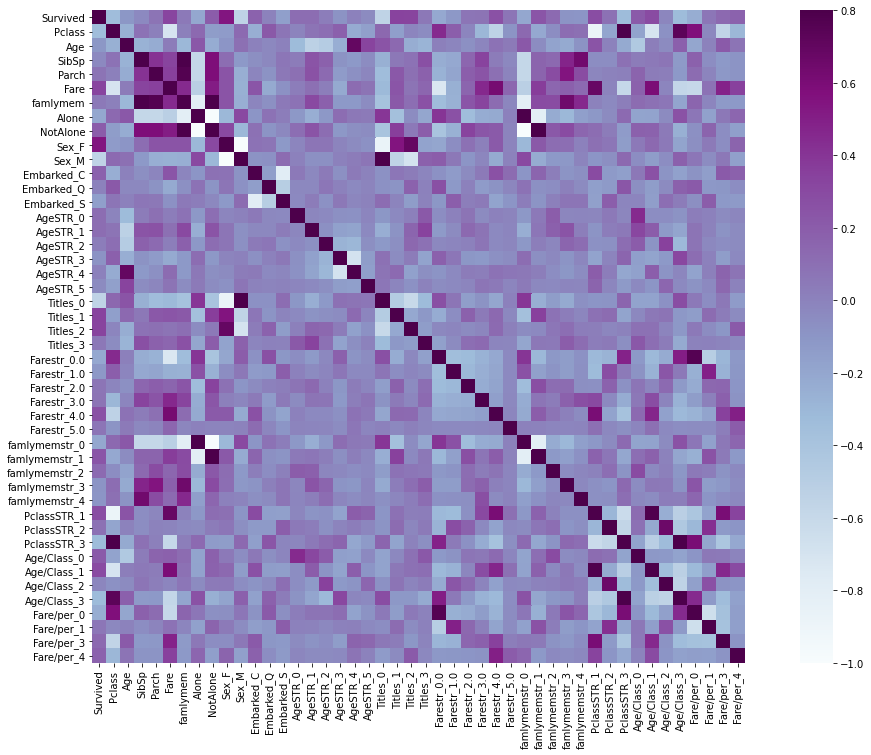

In [ ]:
matrix = df.corr()
f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(matrix,vmax=.8,square=True, cmap='BuPu')

In [ ]:
df2 = df.drop(['famlymem','Age','Fare','Parch','SibSp','Pclass'],axis = 1)

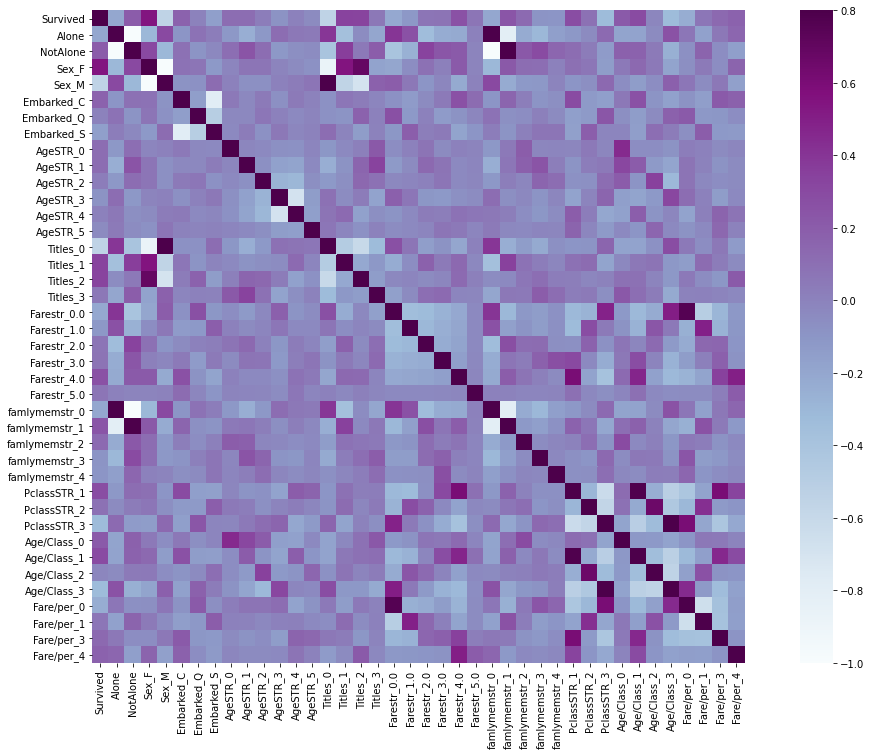

In [ ]:
matrix = df2.corr()
f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(matrix,vmax=.8,square=True, cmap='BuPu')

In [ ]:
dft2 = dft.drop(['famlymem','Age','Fare','Parch','SibSp','Pclass'],axis = 1)

In [ ]:
dft2

,Alone,NotAlone,Sex_F,Sex_M,Embarked_C,Embarked_Q,Embarked_S,AgeSTR_0,AgeSTR_1,AgeSTR_2,AgeSTR_3,AgeSTR_4,AgeSTR_5,Titles_0,Titles_1,Titles_2,Titles_3,Farestr_0.0,Farestr_1.0,Farestr_2.0,Farestr_3.0,Farestr_4.0,Farestr_5.0,famlymemstr_0,famlymemstr_1,famlymemstr_2,famlymemstr_3,famlymemstr_4,PclassSTR_1,PclassSTR_2,PclassSTR_3,Age/Class_0,Age/Class_1,Age/Class_2,Age/Class_3,Fare/per_0,Fare/per_1,Fare/per_3,Fare/per_4
0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
414,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
415,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
416,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df2

,Survived,Alone,NotAlone,Sex_F,Sex_M,Embarked_C,Embarked_Q,Embarked_S,AgeSTR_0,AgeSTR_1,AgeSTR_2,AgeSTR_3,AgeSTR_4,AgeSTR_5,Titles_0,Titles_1,Titles_2,Titles_3,Farestr_0.0,Farestr_1.0,Farestr_2.0,Farestr_3.0,Farestr_4.0,Farestr_5.0,famlymemstr_0,famlymemstr_1,famlymemstr_2,famlymemstr_3,famlymemstr_4,PclassSTR_1,PclassSTR_2,PclassSTR_3,Age/Class_0,Age/Class_1,Age/Class_2,Age/Class_3,Fare/per_0,Fare/per_1,Fare/per_3,Fare/per_4
0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
3,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
887,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
888,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
889,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [ ]:
X = df2.drop('Survived',axis=1)
Y = df2.Survived

## Sampling instead of train_test_split()

In [ ]:
X_tr = df2.sample(frac=0.7)
X_va = df2.loc[~df2.index.isin(X_tr.index),:]

In [ ]:
x_tr = X_tr.drop('Survived',axis=1)
y_tr = X_tr.Survived

x_val = X_va.drop('Survived',axis=1)
y_val = X_va.Survived

In [ ]:
x_tr.shape

(624, 39)

In [ ]:
x_val.shape

(267, 39)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_val = model.predict(x_val)
accuracy = accuracy_score(y_val,pred_val)

In [ ]:
accuracy #Validation Accuracy

0.8277153558052435

In [ ]:
accuracyt = accuracy_score(y_tr,model.predict(x_tr))
accuracyt #Training Accuracy

0.8397435897435898

In [ ]:
from sklearn.metrics import f1_score, precision_score
fi = f1_score(y_val,pred_val)
prec = precision_score(y_val,pred_val)

In [ ]:
fi

0.7676767676767677

In [ ]:
prec

0.8172043010752689

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelr = RandomForestClassifier(max_depth=7, n_estimators=71,max_leaf_nodes = 22)
modelr.fit(x_tr,y_tr)
pred_val = modelr.predict(x_val)
accuracy = accuracy_score(y_val,pred_val)
accuracy

0.8426966292134831

In [ ]:
accuracyt = accuracy_score(y_tr,modelr.predict(x_tr))
accuracyt

0.8557692307692307

## Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelg = GradientBoostingClassifier()
modelg.fit(x_tr,y_tr)
pred_val = modelg.predict(x_val)
accuracy = accuracy_score(y_val,pred_val)
print('Validation-',accuracy)
accuracyt = accuracy_score(y_tr,modelg.predict(x_tr))
print('Training-',accuracyt)

Validation- 0.8239700374531835
Training- 0.8669871794871795


In [ ]:
predRan = modelr.predict(dft2)
df_submitR = pd.read_csv('gender_submission.csv')
df_submitR['PassengerId'] = df_test['PassengerId']
df_submitR['Survived']    = predRan
pd.DataFrame(df_submitR,columns=['PassengerId','Survived']).to_csv('gender_submission37.csv')


## GRID search for Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth' : list(range(1,20,2)),'n_estimators' : list(range(1,250,10)),'max_leaf_nodes':list(range(2,26,2))}
gridsearch = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

x_trg,x_valg,y_trg,y_valg=train_test_split(X,Y,test_size =.30,random_state=1)
gridsearch.fit(x_trg,y_trg)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [ ]:
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=22, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=71,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

## Light GB

In [ ]:
#Lgb
import lightgbm as lgb

param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc','binary_logloss']
num_round=50
train_data = lgb.Dataset(x_tr,label=y_tr)
lgbm = lgb.train(param,train_data,num_round)
y_predval = lgbm.predict(x_val)
y_predval_tr = lgbm.predict(x_tr)
    
for i in range(len(y_predval)):
  if y_predval[i]>.5:
    y_predval[i]=1
  else:
    y_predval[i]=0

accuracy_lgbm = accuracy_score(y_val, y_predval)

print(' Accuracy-- ',accuracy_lgbm)
  
for i in range(len(y_predval_tr)):
  if y_predval_tr[i]>.5:
    y_predval_tr[i]=1
  else:
    y_predval_tr[i]=0

accuracy_lgbm_tr = accuracy_score(y_tr, y_predval_tr)
print('AccuracyT--',accuracy_lgbm_tr)

 Accuracy--  0.8352059925093633
AccuracyT-- 0.8509615384615384


## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(500,280,120),alpha=0.000,batch_size = 64,early_stopping=True)
mlp.fit(x_tr,y_tr)

MLPClassifier(activation='relu', alpha=0.0, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(500, 280, 120), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predmlp = mlp.predict(x_val)
predtrain = mlp.predict(x_tr)

In [ ]:
accuracy = accuracy_score(y_val,predmlp)
accuracy

0.8277153558052435

In [ ]:
accuracyt = accuracy_score(predtrain,y_tr)
accuracyt

0.8733974358974359

## Stratified MLP

In [ ]:
from sklearn.model_selection import StratifiedKFold

i=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle = True)
models =[]
for train_index, test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    x_tr , x_va = X.loc[train_index],X.loc[test_index]
    y_tr , y_va = Y.loc[train_index],Y.loc[test_index]
    model = MLPClassifier(hidden_layer_sizes=(500,280,140),alpha=0.000,random_state=22,batch_size = 64,early_stopping=True)
    model.fit(x_tr,y_tr)
    pred_va = model.predict(x_va)
    accuracy = accuracy_score(y_va,pred_va)
    print(' Accuracy-- ',accuracy)
    pred_tr = model.predict(x_tr)
    accuracyt = accuracy_score(y_tr,pred_tr)
    print(' AccuracyT-- ',accuracyt)
    i+=1
    models.append(model)
    pred = model.predict_proba(x_va)[:,1]
    print(x_tr.shape)


0 of kfold 5
 Accuracy--  0.7821229050279329
 AccuracyT--  0.8918539325842697
(712, 39)

1 of kfold 5
 Accuracy--  0.848314606741573
 AccuracyT--  0.879382889200561
(713, 39)

2 of kfold 5
 Accuracy--  0.797752808988764
 AccuracyT--  0.8541374474053296
(713, 39)

3 of kfold 5
 Accuracy--  0.797752808988764
 AccuracyT--  0.8499298737727911
(713, 39)

4 of kfold 5
 Accuracy--  0.8426966292134831
 AccuracyT--  0.8499298737727911
(713, 39)


## Stratified Logistic Regression

In [ ]:
i=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle = True)
models =[]
for train_index, test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    x_tr , x_va = X.loc[train_index],X.loc[test_index]
    y_tr , y_va = Y.loc[train_index],Y.loc[test_index]
    model = LogisticRegression()
    model.fit(x_tr,y_tr)
    pred_val = model.predict(x_va)
    accuracy = accuracy_score(y_va,pred_val)
    print(' Accuracy-- ',accuracy)
    pred_tr = model.predict(x_tr)
    accuracyt = accuracy_score(y_tr,pred_tr)
    print(' AccuracyT-- ',accuracyt)
    i+=1
    models.append(model)


0 of kfold 5
 Accuracy--  0.8044692737430168
 AccuracyT--  0.8384831460674157

1 of kfold 5
 Accuracy--  0.8202247191011236
 AccuracyT--  0.8373071528751753

2 of kfold 5
 Accuracy--  0.8089887640449438
 AccuracyT--  0.8345021037868162

3 of kfold 5
 Accuracy--  0.7865168539325843
 AccuracyT--  0.8401122019635343

4 of kfold 5
 Accuracy--  0.8764044943820225
 AccuracyT--  0.8260869565217391


#SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_tr, y_tr)
Y_pred = sgd.predict(x_val)

sgd.score(x_tr, y_tr)

0.5427769985974754

In [ ]:
accuracy = accuracy_score(Y_pred,y_val)
accuracy

0.5767790262172284

## STRATIFIED RANDOM FORWST

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle = True)
modelsR = []
for train_index, test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    x_tr , x_va = X.loc[train_index],X.loc[test_index]
    y_tr , y_va = Y.loc[train_index],Y.loc[test_index]
    model = RandomForestClassifier(max_depth=7, n_estimators=21,max_leaf_nodes = 22, random_state=1)
    model.fit(x_tr,y_tr)
    pred_va = model.predict(x_va)
    accuracy = accuracy_score(y_va,pred_va)
    print(' Accuracy-- ',accuracy)
    pred_tr = model.predict(x_tr)
    accuracyt = accuracy_score(y_tr,pred_tr)
    print(' AccuracyT-- ',accuracyt)
    i+=1
    modelsR.append(model)
    pred = model.predict_proba(x_va)[:,1]
    print(x_tr.shape)


1 of kfold 5
 Accuracy--  0.8212290502793296
 AccuracyT--  0.8651685393258427
(712, 39)

2 of kfold 5
 Accuracy--  0.8426966292134831
 AccuracyT--  0.8583450210378681
(713, 39)

3 of kfold 5
 Accuracy--  0.8033707865168539
 AccuracyT--  0.8625525946704067
(713, 39)

4 of kfold 5
 Accuracy--  0.8089887640449438
 AccuracyT--  0.8597475455820477
(713, 39)

5 of kfold 5
 Accuracy--  0.8595505617977528
 AccuracyT--  0.8513323983169705
(713, 39)


## DENSE LAYERS

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
modelk = Sequential()
modelk.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu', input_dim = 39))
modelk.add(Dropout(0.6))
modelk.add(Dense(60, kernel_initializer = 'uniform', activation = 'relu'))
modelk.add(Dropout(0.6))
modelk.add(Dense(15, kernel_initializer = 'uniform', activation = 'relu'))
modelk.add(Dropout(0.6))
modelk.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
modelk.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
modelk.fit(x_tr, y_tr, batch_size = 32, epochs = 200)

Epoch 1/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.6171
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6171
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6296 - accuracy: 0.6171
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.6564
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5392 - accuracy: 0.7658
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7868
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7714
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7910
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7938
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7980
Epoch 11/

In [ ]:
modelk.evaluate(x_val,y_val)

9/9 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8801


[0.2891767621040344, 0.8801498413085938]

## Random Forest works better than all above models.

In [ ]:
predk = modelk.predict(x_val)

In [ ]:
for i in range(len(predk)):
  if predk[i]>0.5:
    predk[i]=1
  else:
    predk[i]=0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,predk)

0.848314606741573

In [ ]:
predk2 = modelk.predict(dft2)

In [ ]:
for i in range(len(predk2)):
  if predk2[i]>0.5:
    predk2[i]=1
  else:
    predk2[i]=0

In [ ]:
predk2

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

In [ ]:
pred_test1 = model1.predict(dft2)
#pred_test2 = model2.predict(dft2)
#pred_test5 = model5.predict(dft2)

In [ ]:
#pred_test_mlp = mlp.predict(dft2)

In [ ]:
df_submit2 = pd.read_csv('gender_submission.csv')

In [ ]:


df_submit2['PassengerId'] = df_test['PassengerId']
df_submit2['Survived']    = predk2


In [ ]:
df_submit2

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [ ]:
pd.DataFrame(df_submit2,columns=['PassengerId','Survived']).to_csv('gender_submission32.csv')
#pd.DataFrame(df_submit5,columns=['PassengerId','Survived']).to_csv('gender_submission17.csv')

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'